In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving NDAP_REPORT_7037.csv to NDAP_REPORT_7037.csv


In [ ]:
df = pd.read_csv('NDAP_REPORT_7037.csv')
print(df.shape)

(108, 75)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 75 columns):
 #   Column                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                          --------------  -----  
 0   ROWID                                                                                                                           108 non-null    int64  
 1   Country                                                                                                                         108 non-null    object 
 2   State lgd code                                                                                                                  108 non-null    int64  
 3   State                                                                                                    

In [ ]:
#stats info
df.describe()


,ROWID,State lgd code,YearCode,Sub centres and health and wellness centers -sub centres functioning in rural areas-i,Primary health centres ( phc ) and health and wellness centers-primary health ( hwc_phc ) centers functioning in rural areas-i,Sub centers ( sc ),Building position of sub centres ( sc ) and health and wellness centres -sub centres ( hwc_sc ) functioning in rural areas,Building position for sub centres functioning in government building in rural areas,Building position for sub centres functioning in rented building in rural areas,Building position for sub centres functioning in rent free panchayat or voluntary society buildings in rural areas,...,Builiding position for primary health centres ( phc ) in government builidings in rural areas-ii,Total builiding position of community health centres ( chc ) in rural areas-ii,Builiding position for community health centres ( chc ) functioning in government builidings in rural areas-ii,Female health worker or auxiliary nurse midwife (anm) at sub center and primary health centre in rural areas- i,Doctors in position at primary health centres ( phc ) in rural areas-i,Total specialists at community health centre ( phc ) in rural areas- i,Radiographers in position at community health centres ( chc )in rural areas-ii,Pharmacists in position at community health centres ( chc ) and primary health centres (phc ) in rural areas-ii,Lab technicians in position at community health centres ( chc ) and primary health centres ( phc ) in rural areas-ii,Nursing staff in position at community health centres ( chc ) and primary health centres ( phc ) in rural areas -ii
count,108.00000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,106.000000,106.000000,106.000000,...,106.000000,108.000000,104.000000,106.000000,106.000000,104.000000,104.000000,106.000000,106.000000,106.000000
mean,54.50000,19.166667,2020.000000,4341.814815,693.638889,148.138889,4341.814815,3146.141509,794.273585,483.320755,...,646.556604,148.138889,150.442308,6241.820755,849.349057,127.336538,69.913462,759.745283,578.688679,2187.424528
std,31.32092,11.223723,0.820303,4879.510827,758.830347,172.567067,4879.510827,4021.465994,1177.534877,742.617655,...,703.422231,172.567067,167.521735,6815.241588,918.163693,176.332914,82.612144,869.697338,604.689797,2761.280262
min,1.00000,1.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.75000,9.750000,2019.000000,305.500000,56.500000,8.500000,305.500000,313.750000,8.000000,0.250000,...,59.750000,8.500000,15.000000,413.250000,78.000000,4.000000,5.000000,60.500000,61.500000,243.500000
50%,54.50000,18.500000,2020.000000,2610.500000,400.500000,85.000000,2610.500000,1598.000000,160.000000,131.000000,...,364.000000,85.000000,85.000000,4469.500000,436.000000,44.500000,28.000000,417.500000,371.500000,1365.500000
75%,81.25000,29.250000,2021.000000,7756.000000,1158.500000,211.500000,7756.000000,4781.250000,1231.250000,751.250000,...,1126.000000,211.500000,216.500000,10013.000000,1429.250000,195.750000,122.000000,1317.000000,908.750000,3058.250000
max,108.00000,38.000000,2021.000000,20782.000000,2936.000000,753.000000,20782.000000,20782.000000,5668.000000,3905.000000,...,2936.000000,753.000000,718.000000,29082.000000,3252.000000,872.000000,343.000000,4655.000000,2185.000000,18504.000000


In [ ]:
df.head()

,ROWID,Country,State lgd code,State,YearCode,Year,Sub centres and health and wellness centers -sub centres functioning in rural areas-i,Primary health centres ( phc ) and health and wellness centers-primary health ( hwc_phc ) centers functioning in rural areas-i,Sub centers ( sc ),Building position of sub centres ( sc ) and health and wellness centres -sub centres ( hwc_sc ) functioning in rural areas,...,Builiding position for primary health centres ( phc ) in government builidings in rural areas-ii,Total builiding position of community health centres ( chc ) in rural areas-ii,Builiding position for community health centres ( chc ) functioning in government builidings in rural areas-ii,Female health worker or auxiliary nurse midwife (anm) at sub center and primary health centre in rural areas- i,Doctors in position at primary health centres ( phc ) in rural areas-i,Total specialists at community health centre ( phc ) in rural areas- i,Radiographers in position at community health centres ( chc )in rural areas-ii,Pharmacists in position at community health centres ( chc ) and primary health centres (phc ) in rural areas-ii,Lab technicians in position at community health centres ( chc ) and primary health centres ( phc ) in rural areas-ii,Nursing staff in position at community health centres ( chc ) and primary health centres ( phc ) in rural areas -ii
0,1,India,1,Jammu And Kashmir,2019,"Financial Year (Apr - Mar), 2019",2958.840663,608.396328,82.162848,2958.840663,...,494.933347,82.162848,82.162848,4800.657843,898.900684,236.707253,221.057187,1207.989494,881.29436,1479.909396
1,2,India,1,Jammu And Kashmir,2020,"Financial Year (Apr - Mar), 2020",2470.000000,923.000000,77.000000,2470.000000,...,714.000000,77.000000,77.000000,4511.000000,940.000000,230.000000,208.000000,1058.000000,882.00000,1385.000000
2,3,India,1,Jammu And Kashmir,2021,"Financial Year (Apr - Mar), 2021",2426.000000,891.000000,63.000000,2426.000000,...,648.000000,63.000000,63.000000,4418.000000,965.000000,181.000000,251.000000,971.000000,696.00000,1525.000000
3,4,India,2,Himachal Pradesh,2019,"Financial Year (Apr - Mar), 2019",2089.000000,586.000000,87.000000,2089.000000,...,455.000000,87.000000,85.000000,1845.000000,486.000000,5.000000,24.000000,293.000000,78.00000,404.000000
4,5,India,2,Himachal Pradesh,2020,"Financial Year (Apr - Mar), 2020",2092.000000,564.000000,85.000000,2092.000000,...,485.000000,85.000000,83.000000,1664.000000,471.000000,21.000000,26.000000,511.000000,48.00000,242.000000


In [ ]:
print(df.isnull().sum())  # Count missing values per column


ROWID                                                                                                                   0
Country                                                                                                                 0
State lgd code                                                                                                          0
State                                                                                                                   0
YearCode                                                                                                                0
                                                                                                                       ..
Total specialists at community health centre ( phc )  in rural areas- i                                                 4
Radiographers in position at community health centres ( chc )in rural areas-ii                                          4
Pharmacists in position 

In [ ]:
df.drop(columns=['ROWID'], inplace=True)


In [ ]:
df['State'].fillna(df['State'].mode()[0], inplace=True)


<ipython-input-9-2bc3fe15e5ba>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna(df['State'].mode()[0], inplace=True)


In [ ]:
# Replace the original line with the following:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [ ]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")


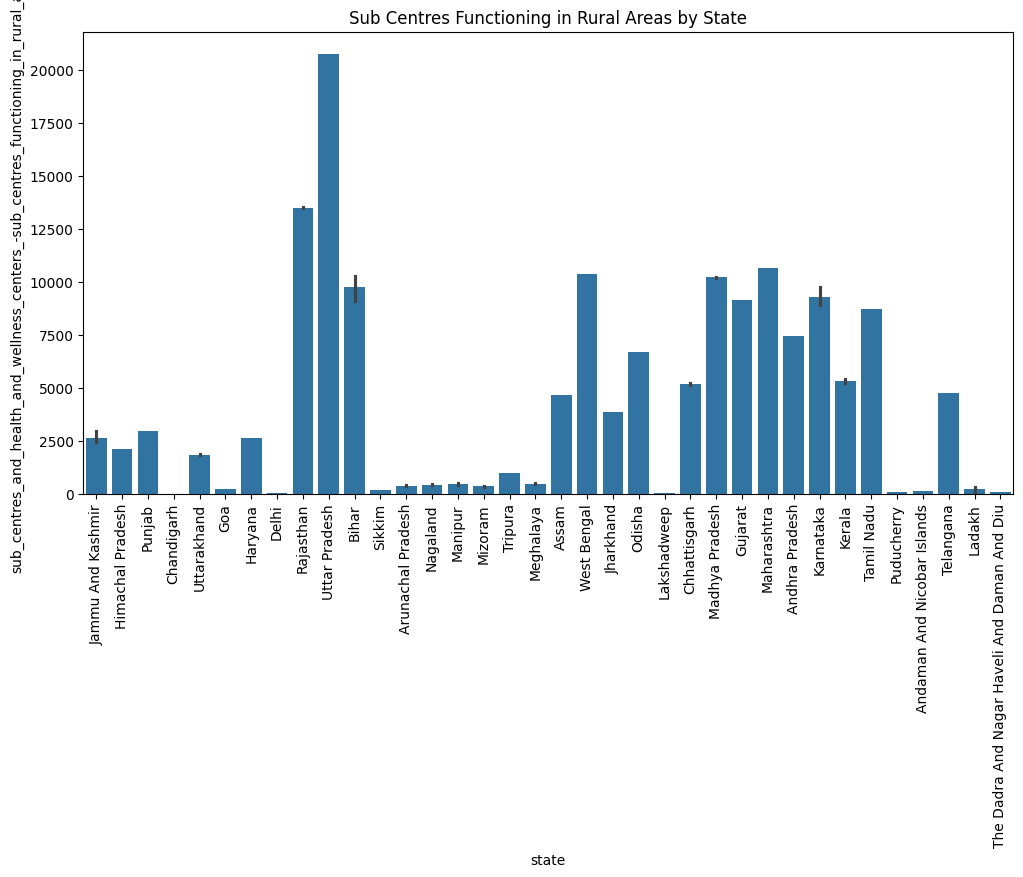

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['state'], y=df['sub_centres_and_health_and_wellness_centers_-sub_centres_functioning_in_rural_areas-i'])
plt.xticks(rotation=90)
plt.title("Sub Centres Functioning in Rural Areas by State")
plt.show()


In [ ]:
print(df.columns)

Index(['country', 'state_lgd_code', 'state', 'yearcode', 'year',
       'sub_centres_and_health_and_wellness_centers_-sub_centres_functioning_in_rural_areas-i',
       'primary_health_centres__phc__and_health_and_wellness_centers-primary_health__hwc_phc__centers_functioning_in_rural_areas-i',
       'sub_centers__sc_',
       'building_position_of_sub_centres__sc__and_health_and_wellness_centres_-sub_centres__hwc_sc__functioning_in_rural_areas',
       'building_position_for_sub_centres_functioning_in_government_building_in_rural_areas',
       'building_position_for_sub_centres_functioning_in_rented_building_in_rural_areas_',
       'building_position_for_sub_centres_functioning_in_rent_free_panchayat_or_voluntary_society_buildings_in_rural_areas',
       'building_position_for_sub_centres_with_buildings_under_construction_in_rural_areas_',
       'building_position_for_primary_health_centres_and_health_and_wellness_canters_functioning_in_rural_areas',
       'building_position_for_pr

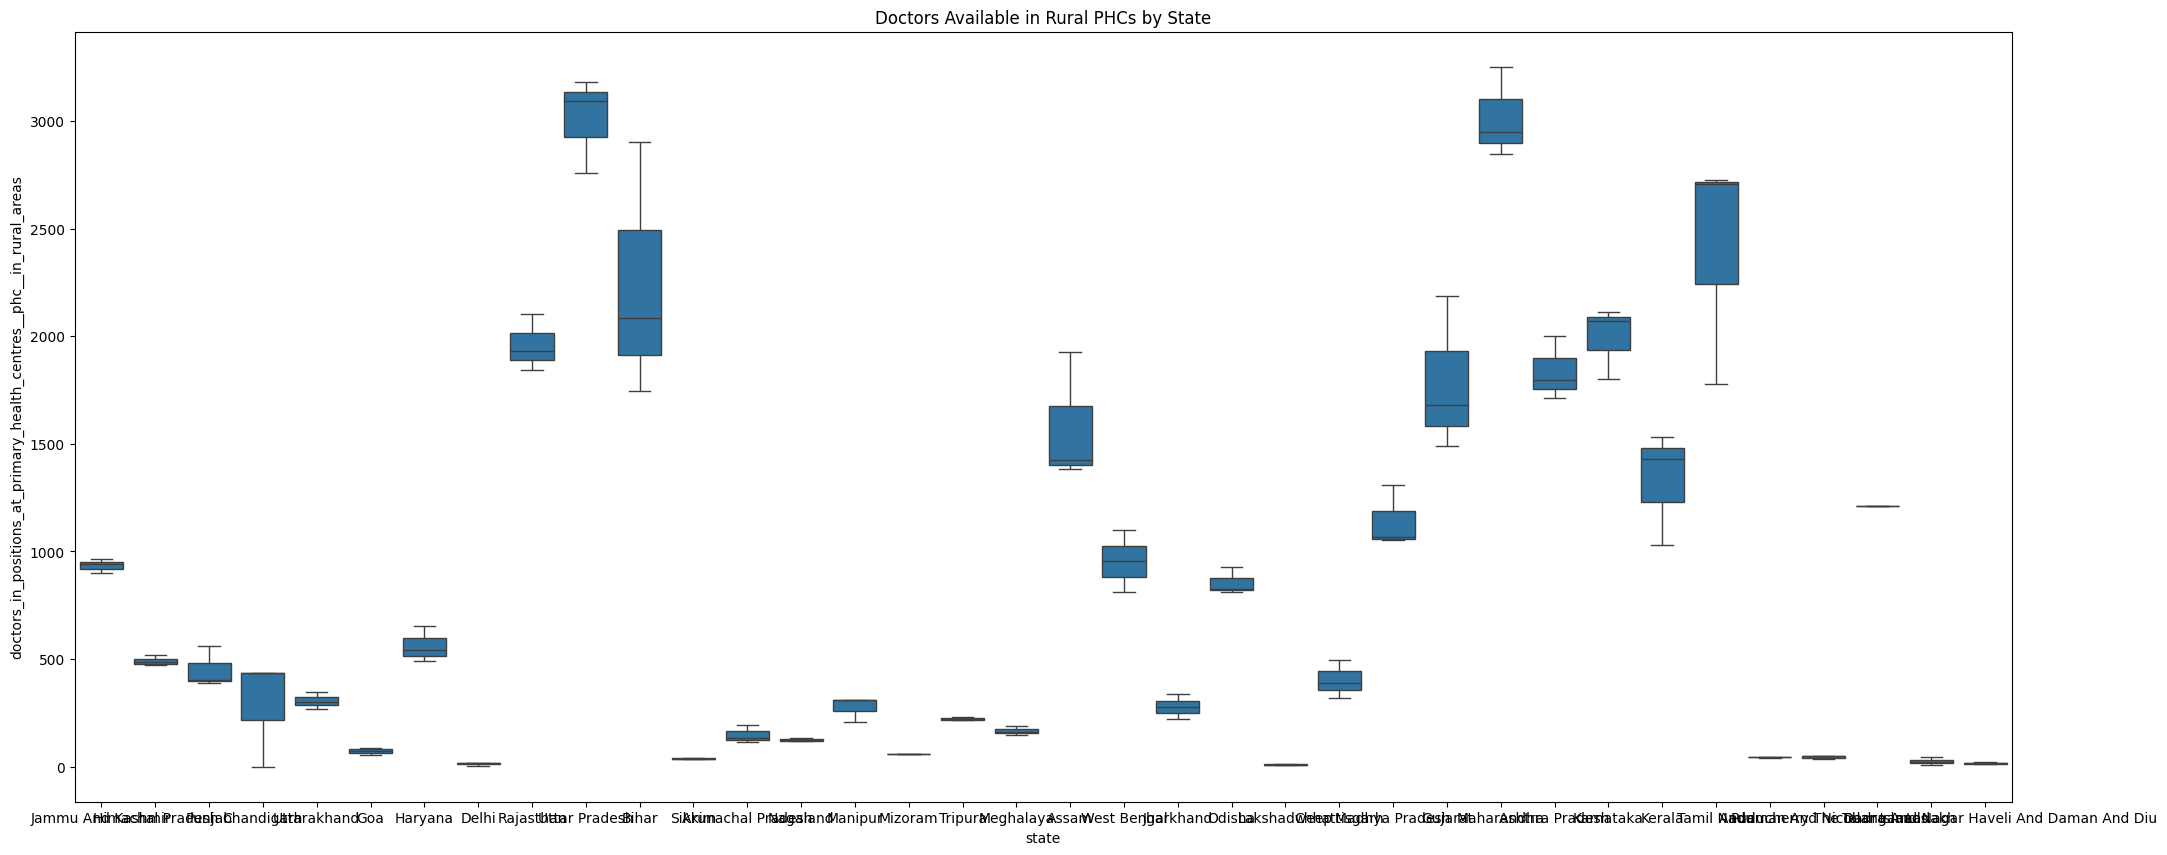

In [ ]:
plt.figure(figsize=(25,10))
# Access the column using the modified name after applying str.lower() and other transformations:
sns.boxplot(x=df['state'], y=df['doctors_in_positions_at_primary_health_centres__phc__in_rural_areas']) #use the updated column nameplt.xticks(rotation=90)
plt.title("Doctors Available in Rural PHCs by State")
plt.show()

In [ ]:
import pandas as pd

# Dictionary containing latitude and longitude for all states and UTs in India
state_coordinates = {
    "Andhra Pradesh": [15.9129, 79.7400],
    "Arunachal Pradesh": [28.2180, 94.7278],
    "Assam": [26.2006, 92.9376],
    "Bihar": [25.0961, 85.3131],
    "Chhattisgarh": [21.2787, 81.8661],
    "Goa": [15.2993, 74.1240],
    "Gujarat": [22.2587, 71.1924],
    "Haryana": [29.0588, 76.0856],
    "Himachal Pradesh": [31.1048, 77.1734],
    "Jharkhand": [23.6102, 85.2799],
    "Karnataka": [15.3173, 75.7139],
    "Kerala": [10.8505, 76.2711],
    "Madhya Pradesh": [23.2599, 77.4126],
    "Maharashtra": [19.7515, 75.7139],
    "Manipur": [24.6637, 93.9063],
    "Meghalaya": [25.4670, 91.3662],
    "Mizoram": [23.1645, 92.9376],
    "Nagaland": [26.1584, 94.5624],
    "Odisha": [20.9517, 85.0985],
    "Punjab": [31.1471, 75.3412],
    "Rajasthan": [27.0238, 74.2179],
    "Sikkim": [27.5330, 88.5122],
    "Tamil Nadu": [11.1271, 78.6569],
    "Telangana": [18.1124, 79.0193],
    "Tripura": [23.9408, 91.9882],
    "Uttar Pradesh": [26.8467, 80.9462],
    "Uttarakhand": [30.0668, 79.0193],
    "West Bengal": [22.9868, 87.8550],
    "Andaman and Nicobar Islands": [11.7401, 92.6586],
    "Chandigarh": [30.7333, 76.7794],
    "Dadra and Nagar Haveli and Daman and Diu": [20.3974, 72.8328],
    "Lakshadweep": [10.5667, 72.6417],
    "Delhi": [28.7041, 77.1025],
    "Puducherry": [11.9416, 79.8083],
    "Ladakh": [34.1526, 77.5770],
    "Jammu and Kashmir": [33.7782, 76.5762]
}

# Create a sample dataframe (if not already loaded)
df = pd.DataFrame({'state': state_coordinates.keys()})  # Replace with your actual data

# Assign Coordinates to DataFrame
df['latitude'] = df['state'].map(lambda x: state_coordinates.get(x, [None, None])[0])
df['longitude'] = df['state'].map(lambda x: state_coordinates.get(x, [None, None])[1])

# Drop rows where coordinates are missing (if any)
df = df.dropna(subset=['latitude', 'longitude'])

# Display the updated dataframe
print(df[['state', 'latitude', 'longitude']].head())


               state  latitude  longitude
0     Andhra Pradesh   15.9129    79.7400
1  Arunachal Pradesh   28.2180    94.7278
2              Assam   26.2006    92.9376
3              Bihar   25.0961    85.3131
4       Chhattisgarh   21.2787    81.8661


In [ ]:
print(df[['state', 'latitude', 'longitude']].head(10))  # Check first 10 rows
print(df[['state', 'latitude', 'longitude']].isnull().sum())  # Count missing values


               state  latitude  longitude
0     Andhra Pradesh   15.9129    79.7400
1  Arunachal Pradesh   28.2180    94.7278
2              Assam   26.2006    92.9376
3              Bihar   25.0961    85.3131
4       Chhattisgarh   21.2787    81.8661
5                Goa   15.2993    74.1240
6            Gujarat   22.2587    71.1924
7            Haryana   29.0588    76.0856
8   Himachal Pradesh   31.1048    77.1734
9          Jharkhand   23.6102    85.2799
state        0
latitude     0
longitude    0
dtype: int64


In [ ]:
unique_states = df['state'].unique()
print(unique_states)  # Check unique state names in the dataset


['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jharkhand' 'Karnataka' 'Kerala'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Andaman and Nicobar Islands'
 'Chandigarh' 'Dadra and Nagar Haveli and Daman and Diu' 'Lakshadweep'
 'Delhi' 'Puducherry' 'Ladakh' 'Jammu and Kashmir']


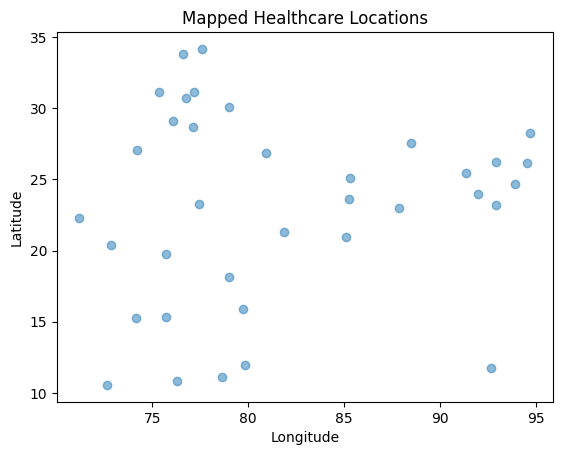

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mapped Healthcare Locations")
plt.show()


In [ ]:
map_center = [20.5937, 78.9629]  # Example: India's coordinates
m = folium.Map(location=map_center, zoom_start=5)

for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],  # Adjust column names
        popup=f"{row['state']} - {row['sub_centres_and_health_and_wellness_centers_-sub_centres_functioning_in_rural_areas-i']}",
        icon=folium.Icon(color="blue")
    ).add_to(m)

m.save("healthcare_map.html")  # Open this file in a browser to view


In [ ]:
!pip install folium
import folium
import pandas as pd

# ... (Your existing code for loading data and coordinates) ...

# Load original dataset
original_df = pd.read_csv('NDAP_REPORT_7037.csv') # Load the original dataframe with healthcare data

# Assuming column name changes were applied earlier
original_df.columns = original_df.columns.str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Merge coordinates with original data
df = pd.merge(df, original_df[['state', 'sub_centres_and_health_and_wellness_centers_-sub_centres_functioning_in_rural_areas-i']], on='state', how='left')

map_center = [20.5937, 78.9629]  # Example: India's coordinates
m = folium.Map(location=map_center, zoom_start=5)

for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['state']} - {row['sub_centres_and_health_and_wellness_centers_-sub_centres_functioning_in_rural_areas-i']}", # Access the correct column name
        icon=folium.Icon(color="blue")
    ).add_to(m)

m.save("healthcare_map.html")  # Open this file in a browser to view

In [ ]:
from google.colab import files
files.download("healthcare_map.html")  # Download to your local machine


FileNotFoundError: Cannot find file: healthcare_map.html

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
import pandas as pd
import folium
from google.colab import files

# Load original dataset
original_df = pd.read_csv('NDAP_REPORT_7037.csv')

# Clean column names
original_df.columns = original_df.columns.str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Dictionary of state-wise coordinates
state_coordinates = {
    "Andhra Pradesh": [15.9129, 79.7400],
    "Arunachal Pradesh": [28.2180, 94.7278],
    "Assam": [26.2006, 92.9376],
    "Bihar": [25.0961, 85.3131],
    "Chhattisgarh": [21.2787, 81.8661],
    "Goa": [15.2993, 74.1240],
    "Gujarat": [22.2587, 71.1924],
    "Haryana": [29.0588, 76.0856],
    "Himachal Pradesh": [31.1048, 77.1734],
    "Jharkhand": [23.6102, 85.2799],
    "Karnataka": [15.3173, 75.7139],
    "Kerala": [10.8505, 76.2711],
    "Madhya Pradesh": [23.2599, 77.4126],
    "Maharashtra": [19.7515, 75.7139],
    "Manipur": [24.6637, 93.9063],
    "Meghalaya": [25.4670, 91.3662],
    "Mizoram": [23.1645, 92.9376],
    "Nagaland": [26.1584, 94.5624],
    "Odisha": [20.9517, 85.0985],
    "Punjab": [31.1471, 75.3412],
    "Rajasthan": [27.0238, 74.2179],
    "Sikkim": [27.5330, 88.5122],
    "Tamil Nadu": [11.1271, 78.6569],
    "Telangana": [18.1124, 79.0193],
    "Tripura": [23.9408, 91.9882],
    "Uttar Pradesh": [26.8467, 80.9462],
    "Uttarakhand": [30.0668, 79.0193],
    "West Bengal": [22.9868, 87.8550],
    "Andaman and Nicobar Islands": [11.7401, 92.6586],
    "Chandigarh": [30.7333, 76.7794],
    "Dadra and Nagar Haveli and Daman and Diu": [20.3974, 72.8328],
    "Lakshadweep": [10.5667, 72.6417],
    "Delhi": [28.7041, 77.1025],
    "Puducherry": [11.9416, 79.8083],
    "Ladakh": [34.1526, 77.5770],
    "Jammu and Kashmir": [33.7782, 76.5762]
}

# Updated state-wise population data
state_population = {
    "Jammu and Kashmir": 12267013,
    "Himachal Pradesh": 6864602,
    "Punjab": 27743338,
    "Chandigarh": 1055450,
    "Uttarakhand": 10086292,
    "Haryana": 25351462,
    "Delhi": 16787941,
    "Rajasthan": 68548437,
    "Uttar Pradesh": 241066874,  # Removed commas
    "Bihar": 104099452,
    "Sikkim": 610577,
    "Arunachal Pradesh": 1383727,
    "Nagaland": 1978502,
    "Manipur": 2855794,
    "Mizoram": 1097206,
    "Tripura": 3673917,
    "Meghalaya": 2966889,
    "Assam": 31205576,
    "West Bengal": 91276115,
    "Jharkhand": 32988134,
    "Odisha": 41980846,
    "Chhattisgarh": 25545198,
    "Madhya Pradesh": 72641665,
    "Gujarat": 60443083,
    "Maharashtra": 112374333,
    "Andhra Pradesh": 49577103,
    "Karnataka": 61095297,
    "Goa": 1458545,
    "Lakshadweep": 64473,
    "Kerala": 33406061,
    "Tamil Nadu": 72147030,
    "Puducherry": 1247953,
    "Andaman and Nicobar Islands": 380581,
    "Telangana": 35003674,
    "Ladakh": 274289,
    "Dadra and Nagar Haveli and Daman and Diu": 586956
}

# Create a dataframe with state and coordinates
df = pd.DataFrame({'state': state_coordinates.keys()})
df['latitude'] = df['state'].map(lambda x: state_coordinates.get(x, [None, None])[0])
df['longitude'] = df['state'].map(lambda x: state_coordinates.get(x, [None, None])[1])
df['population'] = df['state'].map(lambda x: state_population.get(x, None))  # Add population column
df = df.dropna(subset=['latitude', 'longitude'])

# Merge with original dataframe to include relevant columns
df = pd.merge(df, original_df, on='state', how='left')  # Merge to keep all original columns

# Calculate doctors per 10000 population
df['doctors_per_10000'] = df['doctors_in_positions_at_primary_health_centres__phc__in_rural_areas'] / df['population'] * 1000

# Identify states with low doctors per 10000 people
low_doctor_regions = df[df['doctors_per_10000'] < df['doctors_per_10000'].quantile(0.25)]
print(low_doctor_regions[['state', 'doctors_per_10000', 'population']])



FileNotFoundError: [Errno 2] No such file or directory: 'NDAP_REPORT_7037.csv'

In [ ]:
high_doctor_regions = df[df['doctors_per_10000'] < df['doctors_per_10000'].quantile(0.75)]
print(high_doctor_regions[['state', 'doctors_per_10000', 'population']])


             state  doctors_per_10000  population
0   Andhra Pradesh           0.345926    49577103
1   Andhra Pradesh           0.362667    49577103
2   Andhra Pradesh           0.403614    49577103
7            Assam           0.456329    31205576
8            Assam           0.443190    31205576
..             ...                ...         ...
94           Delhi           0.009531    16787941
95      Puducherry           0.328538     1247953
96      Puducherry           0.360591     1247953
97      Puducherry           0.360591     1247953
99          Ladakh           0.364579      274289

[72 rows x 3 columns]


<ipython-input-32-187c11f142f1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', data=high_doctor_states, palette='viridis')


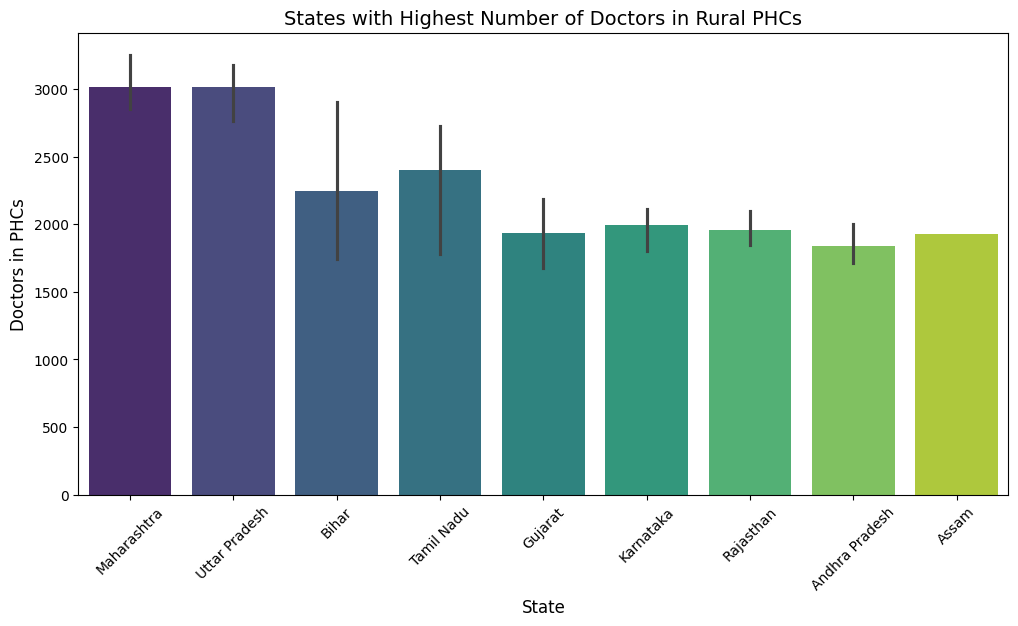

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter states with high number of doctors (top 25%)
high_doctor_states = df[df['doctors_in_positions_at_primary_health_centres__phc__in_rural_areas'] > df['doctors_in_positions_at_primary_health_centres__phc__in_rural_areas'].quantile(0.75)]

# Sort for better visualization
high_doctor_states = high_doctor_states.sort_values(by='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', data=high_doctor_states, palette='viridis')

# Improve readability
plt.xticks(rotation=45)
plt.xlabel("State", fontsize=12)
plt.ylabel("Doctors in PHCs", fontsize=12)
plt.title("States with Highest Number of Doctors in Rural PHCs", fontsize=14)

# Show plot
plt.show()


<ipython-input-33-04d97a7c86a8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', data=high_doctor_states, palette='viridis')


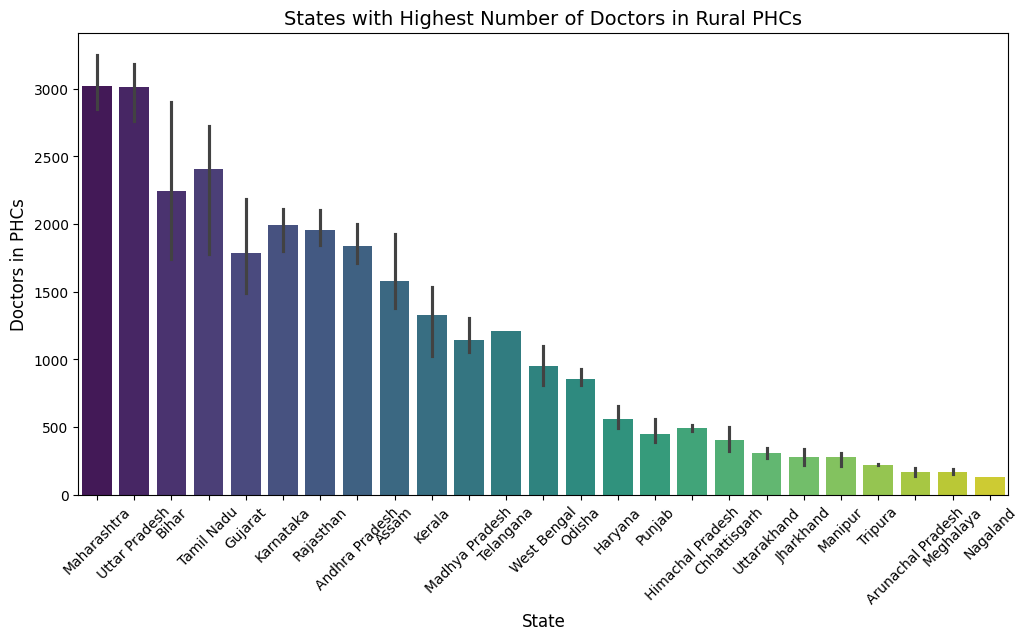

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter states with high number of doctors (top 25%)
high_doctor_states = df[df['doctors_in_positions_at_primary_health_centres__phc__in_rural_areas'] > df['doctors_in_positions_at_primary_health_centres__phc__in_rural_areas'].quantile(0.25)]

# Sort for better visualization
high_doctor_states = high_doctor_states.sort_values(by='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', data=high_doctor_states, palette='viridis')

# Improve readability
plt.xticks(rotation=45)
plt.xlabel("State", fontsize=12)
plt.ylabel("Doctors in PHCs", fontsize=12)
plt.title("States with Highest Number of Doctors in Rural PHCs", fontsize=14)

# Show plot
plt.show()


<ipython-input-34-152abbc9b718>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', data=low_doctor_states, palette='Reds_r')


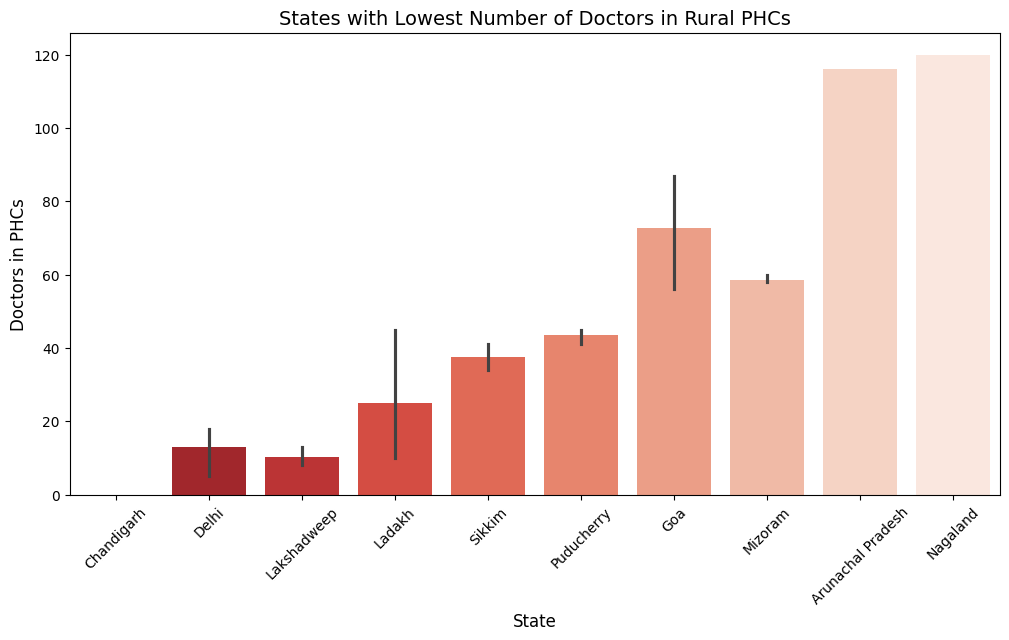

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter states with low number of doctors (bottom 25%)
low_doctor_states = df[df['doctors_in_positions_at_primary_health_centres__phc__in_rural_areas'] < df['doctors_in_positions_at_primary_health_centres__phc__in_rural_areas'].quantile(0.25)]

# Sort for better visualization
low_doctor_states = low_doctor_states.sort_values(by='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', ascending=True)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', data=low_doctor_states, palette='Reds_r')

# Improve readability
plt.xticks(rotation=45)
plt.xlabel("State", fontsize=12)
plt.ylabel("Doctors in PHCs", fontsize=12)
plt.title("States with Lowest Number of Doctors in Rural PHCs", fontsize=14)

# Show plot
plt.show()


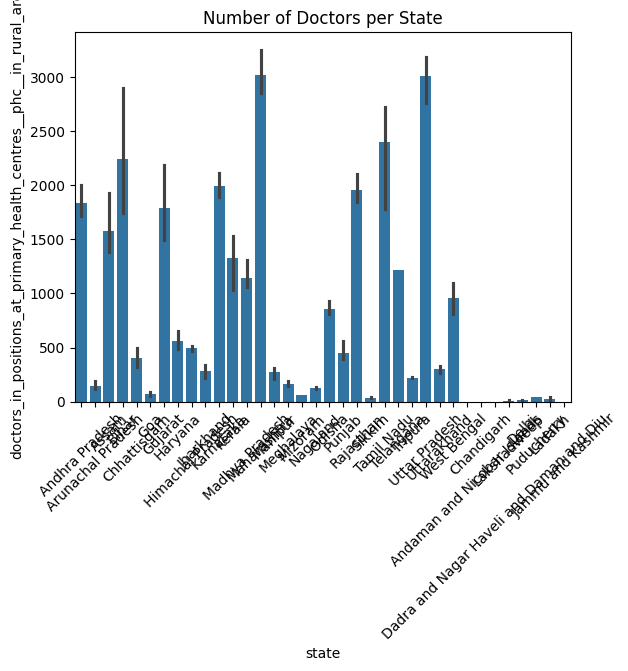

In [ ]:
sns.barplot(x='state', y='doctors_in_positions_at_primary_health_centres__phc__in_rural_areas', data=df)
plt.xticks(rotation=45)
plt.title("Number of Doctors per State")
plt.show()

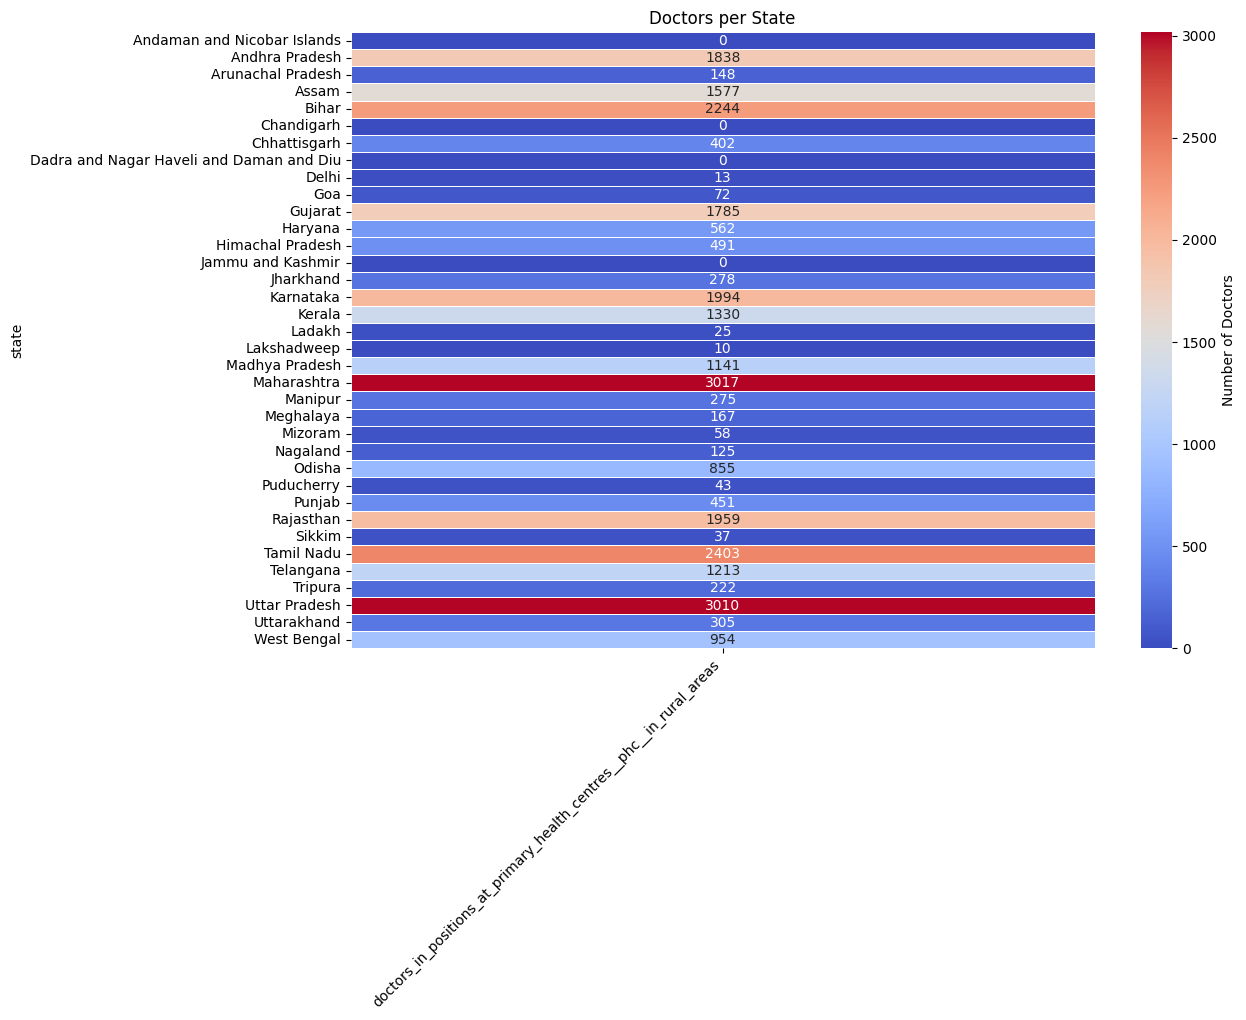

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure values are integers (convert float to int)
df["doctors_in_positions_at_primary_health_centres__phc__in_rural_areas"] = (
    df["doctors_in_positions_at_primary_health_centres__phc__in_rural_areas"]
    .fillna(0)  # Fill NaN with 0
    .astype(int)  # Convert to integer
)

# Pivot table for heatmap
pivot_df = df.pivot_table(index="state", values="doctors_in_positions_at_primary_health_centres__phc__in_rural_areas")

# Ensure no missing values in the pivot table
pivot_df = pivot_df.fillna(0).astype(int)

# Create heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    pivot_df,
    cmap="coolwarm",
    annot=True,
    fmt="d",  # Ensure integer format
    linewidths=0.5,
    cbar_kws={'label': 'Number of Doctors'}
)

# Adjust labels for readability
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Doctors per State")

# Show the plot
plt.show()


In [ ]:
# Identify states with the lowest healthcare facilities per capita
low_facility_states = df.sort_values(by='doctors_per_10000').head(10)
print(low_facility_states[['state', 'doctors_per_10000', 'population']])


            state  doctors_per_10000  population
85     Chandigarh           0.000000     1055450
92          Delhi           0.002978    16787941
94          Delhi           0.009531    16787941
93          Delhi           0.010722    16787941
28      Jharkhand           0.067297    32988134
29      Jharkhand           0.084273    32988134
81    West Bengal           0.088742    91276115
27      Jharkhand           0.101855    32988134
83    West Bengal           0.104628    91276115
76  Uttar Pradesh           0.114450   241066874


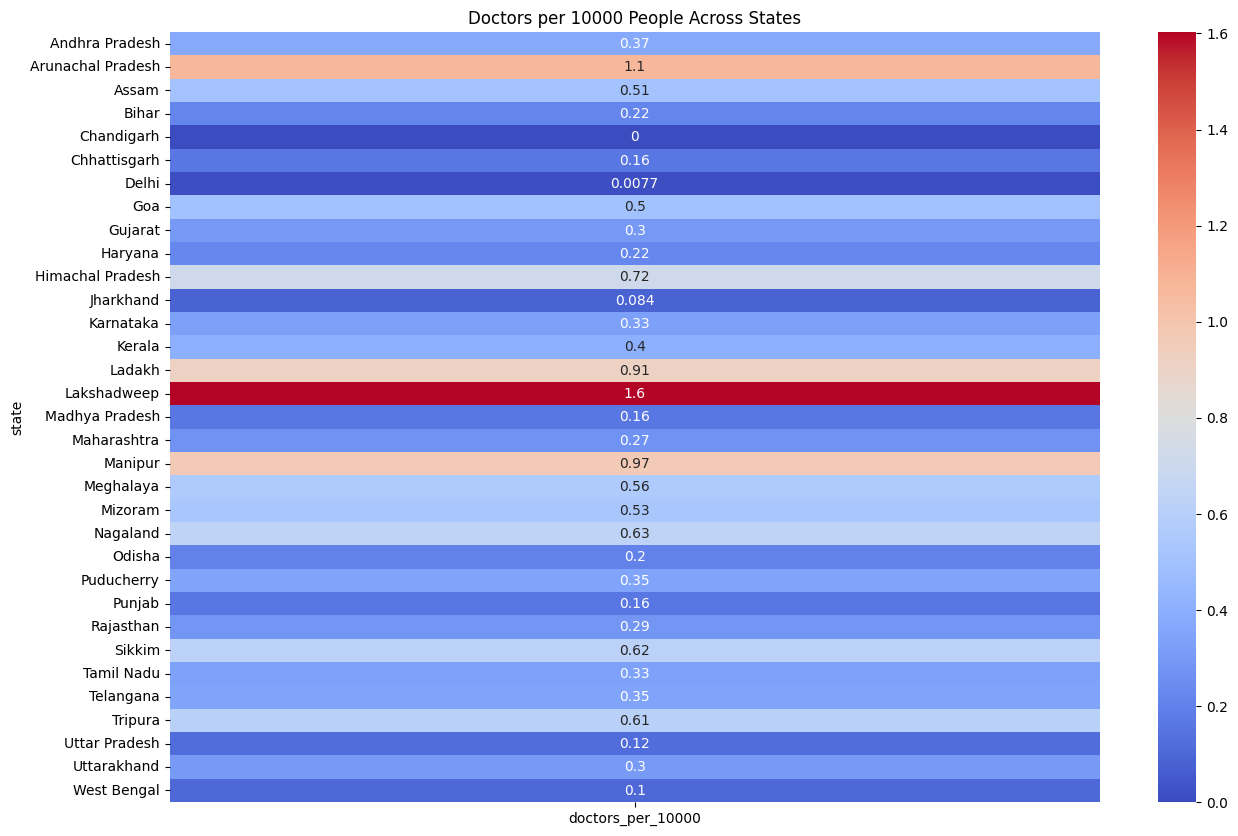

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df.pivot_table(index="state", values="doctors_per_10000"), cmap="coolwarm", annot=True)
plt.title("Doctors per 1000 People Across States")
plt.show()


In [ ]:
df.to_csv("processed_healthcare_data.csv", index=False)

NameError: name 'df' is not defined

In [ ]:
from google.colab import files
files.download("processed_healthcare_data.csv")  # Download to your local machine


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>